In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

# DATA

The 2nd part of data cleaning is in ArcGIS pro. named the folder as part_2_cleaning. This is 3rd part and final part of data cleaning before merging. Outage data taken from ArcGIS output and weather data taken from part 1 cleaning output dataset

In [2]:
df = pd.read_csv('../output/outage_station_population.csv')
df_w = pd.read_csv('../output/weather_final.csv')

df.head(5)

,OID_,Join_Count,TARGET_FID,Join_Count_1,TARGET_FID_1,date_out,time_out,day,month,year,...,fastest_2_min_wind_speed,STATE_ABBR,STATE_FIPS,COUNTY_FIPS,STCOFIPS,TRACT_FIPS,FIPS,POPULATION,POP_SQMI,SQMI
0,1,1,1,1,1,2/25/2019 0:00:00,19:23:00,25,2,2021,...,14.8,MA,25.0,27.0,25027.0,711100.0,2.502771e+10,4955.0,375.7,13.19
1,2,1,2,1,2,5/3/2019 6:54:00,11:40:00,3,5,2021,...,14.8,MA,25.0,27.0,25027.0,711100.0,2.502771e+10,4955.0,375.7,13.19
2,3,1,3,1,3,5/6/2019 7:45:00,8:13:00,6,5,2021,...,14.8,MA,25.0,27.0,25027.0,712102.0,2.502771e+10,4433.0,319.2,13.89
3,4,1,4,1,4,5/31/2019 19:27:00,10:13:00,31,5,2021,...,14.8,MA,25.0,27.0,25027.0,711100.0,2.502771e+10,4955.0,375.7,13.19
4,5,1,5,1,5,8/1/2019 9:51:00,10:58:00,1,8,2021,...,14.8,MA,25.0,27.0,25027.0,711100.0,2.502771e+10,4955.0,375.7,13.19


In [3]:
df.columns

Index(['OID_', 'Join_Count', 'TARGET_FID', 'Join_Count_1', 'TARGET_FID_1',
       'date_out', 'time_out', 'day', 'month', 'year', 'date_in', 'time_in',
       'outage_duration', 'number_of_customers_affected', 'city_town',
       'reason_for_outage', 'Latitude', 'Longitude', 'voltage_levels',
       'STATION', 'NAME', 'DATE', 'Avg_daily_wind', 'precipitation', 'snow',
       'TAVG', 'temp_max', 'temp_min', 'fastest_2_min_wind_speed',
       'STATE_ABBR', 'STATE_FIPS', 'COUNTY_FIPS', 'STCOFIPS', 'TRACT_FIPS',
       'FIPS', 'POPULATION', 'POP_SQMI', 'SQMI'],
      dtype='object')

# Merging the datasets

In [4]:
# taking only required columns
df_new = df[['date_out', 'time_out', 'day', 'month', 'year', 'date_in', 'time_in',
       'outage_duration', 'number_of_customers_affected', 'city_town',
       'reason_for_outage', 'Latitude', 'Longitude','STATION', 'NAME','POPULATION']].copy()
df_new.head(5)

,date_out,time_out,day,month,year,date_in,time_in,outage_duration,number_of_customers_affected,city_town,reason_for_outage,Latitude,Longitude,STATION,NAME,POPULATION
0,2/25/2019 0:00:00,19:23:00,25,2,2021,2/24/2019 0:00:00,20:45:00,1.35,81,fitchburg,Action by Others,42.5904,-71.8120,USW00004780,"FITCHBURG MUNICIPAL AIRPORT, MA US",4955.0
1,5/3/2019 6:54:00,11:40:00,3,5,2021,5/1/2019 0:00:00,12:35:00,0.91,1,fitchburg,Action by Others,42.5904,-71.8120,USW00004780,"FITCHBURG MUNICIPAL AIRPORT, MA US",4955.0
2,5/6/2019 7:45:00,8:13:00,6,5,2021,5/3/2019 0:00:00,9:05:00,0.85,1,lunenburg,Action by Others,42.5902,-71.7154,USW00004780,"FITCHBURG MUNICIPAL AIRPORT, MA US",4433.0
3,5/31/2019 19:27:00,10:13:00,31,5,2021,5/31/2019 0:00:00,12:34:00,2.35,61,fitchburg,Action by Others,42.5904,-71.8120,USW00004780,"FITCHBURG MUNICIPAL AIRPORT, MA US",4955.0
4,8/1/2019 9:51:00,10:58:00,1,8,2021,7/26/2019 0:00:00,15:40:00,4.69,25,fitchburg,Action by Others,42.5904,-71.8120,USW00004780,"FITCHBURG MUNICIPAL AIRPORT, MA US",4955.0


In [5]:
df_new.dtypes

date_out                         object
time_out                         object
day                               int64
month                             int64
year                              int64
date_in                          object
time_in                          object
outage_duration                 float64
number_of_customers_affected      int64
city_town                        object
reason_for_outage                object
Latitude                        float64
Longitude                       float64
STATION                          object
NAME                             object
POPULATION                      float64
dtype: object

In [6]:
df_new['date_out'] = pd.to_datetime(df_new['date_out']).dt.date

df_new.head(5)

,date_out,time_out,day,month,year,date_in,time_in,outage_duration,number_of_customers_affected,city_town,reason_for_outage,Latitude,Longitude,STATION,NAME,POPULATION
0,2019-02-25,19:23:00,25,2,2021,2/24/2019 0:00:00,20:45:00,1.35,81,fitchburg,Action by Others,42.5904,-71.8120,USW00004780,"FITCHBURG MUNICIPAL AIRPORT, MA US",4955.0
1,2019-05-03,11:40:00,3,5,2021,5/1/2019 0:00:00,12:35:00,0.91,1,fitchburg,Action by Others,42.5904,-71.8120,USW00004780,"FITCHBURG MUNICIPAL AIRPORT, MA US",4955.0
2,2019-05-06,8:13:00,6,5,2021,5/3/2019 0:00:00,9:05:00,0.85,1,lunenburg,Action by Others,42.5902,-71.7154,USW00004780,"FITCHBURG MUNICIPAL AIRPORT, MA US",4433.0
3,2019-05-31,10:13:00,31,5,2021,5/31/2019 0:00:00,12:34:00,2.35,61,fitchburg,Action by Others,42.5904,-71.8120,USW00004780,"FITCHBURG MUNICIPAL AIRPORT, MA US",4955.0
4,2019-08-01,10:58:00,1,8,2021,7/26/2019 0:00:00,15:40:00,4.69,25,fitchburg,Action by Others,42.5904,-71.8120,USW00004780,"FITCHBURG MUNICIPAL AIRPORT, MA US",4955.0


In [7]:
df_new = df_new.rename(columns={'date_out':'DATE'})
df_new['DATE'] = pd.to_datetime(df_new.DATE, format='%Y-%m-%d')

In [8]:
df_new.dtypes

DATE                            datetime64[ns]
time_out                                object
day                                      int64
month                                    int64
year                                     int64
date_in                                 object
time_in                                 object
outage_duration                        float64
number_of_customers_affected             int64
city_town                               object
reason_for_outage                       object
Latitude                               float64
Longitude                              float64
STATION                                 object
NAME                                    object
POPULATION                             float64
dtype: object

In [9]:
df_w.dtypes

STATION                      object
NAME                         object
LATITUDE                    float64
LONGITUDE                   float64
DATE                         object
Avg_daily_wind              float64
precipitation               float64
snow                        float64
TAVG                        float64
temp_max                    float64
temp_min                    float64
fastest_2_min_wind_speed    float64
YEAR                          int64
MONTH                         int64
DAY                           int64
dtype: object

In [10]:
df_w['DATE'] = pd.to_datetime(df_w.DATE, format='%Y-%m-%d')

In [11]:
df_w.dtypes

STATION                             object
NAME                                object
LATITUDE                           float64
LONGITUDE                          float64
DATE                        datetime64[ns]
Avg_daily_wind                     float64
precipitation                      float64
snow                               float64
TAVG                               float64
temp_max                           float64
temp_min                           float64
fastest_2_min_wind_speed           float64
YEAR                                 int64
MONTH                                int64
DAY                                  int64
dtype: object

In [12]:
#merging weather and outages
df_final = df_new.merge(df_w, on=['DATE','STATION'], how='left')

In [13]:
len(df_final.STATION.unique())

19

# Cleaning dataset

In [14]:
# columns to be removed because of negative customers affected reported
df_final.loc[df_final.number_of_customers_affected <0].shape[0]

18

In [15]:
df_final = df_final.loc[df_final.number_of_customers_affected >0]

In [16]:
# creating electricity reliability metric
df_final['SAIDI'] = (df_final.outage_duration*df_final.number_of_customers_affected)/df_final.POPULATION

In [17]:
#finding missing vaues percentages
percent_missing = df_final.isnull().sum() * 100 / len(df_final)
missing_value_df = pd.DataFrame({'column_name': df_final.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
DATE,DATE,0.000000
time_out,time_out,0.000000
day,day,0.000000
month,month,0.000000
year,year,0.000000
date_in,date_in,0.000000
time_in,time_in,0.000000
outage_duration,outage_duration,0.000000
number_of_customers_affected,number_of_customers_affected,0.000000
city_town,city_town,0.007659


In [18]:
df_final.shape[0]

117510

In [19]:
# drop rows with nan values
df_clean = df_final.dropna(subset=['Avg_daily_wind', 'precipitation', 'temp_min', 'temp_max', 'fastest_2_min_wind_speed', 'SAIDI'])
# dropping columns that will not be used
df_clean = df_clean.drop(['TAVG'], axis=1)

In [20]:
df_clean.shape[0]

111212

In [21]:
# filling in nan values for snow with the monthly average snow amount for that year
tem = df_clean.groupby(['YEAR', 'MONTH'])[['snow']].mean().reset_index()
tem.rename(columns={'snow': 'snow_mean'}, inplace=True)
df_clean_final = pd.merge(df_clean, tem, how='left', on=['YEAR', 'MONTH'])
df_clean_final.snow.fillna(df_clean_final.snow_mean, inplace=True)

# drop monthly mean by year cols generated by above
df_clean_final =  df_clean_final.drop( [ 'snow_mean'], axis=1)

In [22]:
#finding missing vaues percentages
percent_missing = df_clean_final.isnull().sum() * 100 / len(df_clean_final)
missing_value_df = pd.DataFrame({'column_name': df_clean_final.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
DATE,DATE,0.0
time_out,time_out,0.0
day,day,0.0
month,month,0.0
year,year,0.0
date_in,date_in,0.0
time_in,time_in,0.0
outage_duration,outage_duration,0.0
number_of_customers_affected,number_of_customers_affected,0.0
city_town,city_town,0.0


# Visualising the reasons for outage

In [23]:
df_clean_final['reason_for_outage'] =  df_clean_final['reason_for_outage'].replace({'Adverse Environment':'Weather',
                                                        'Lightning':'Weather',
                                            'Loose/Failed Connection':'Supplier Problems',
                                                        'Improper Installation' :'Supplier Problems' ,
                                                'Loss of Supply':'Supplier Problems',
                                                'Operator Error/System Malfunction':'Supplier Problems',
                                                        
                                                 'Failed Equipment':'Supplier Problems' ,
                                           
       'Overload': 'Other', 'Physical Interference':'Other',
        'Scheduled - Planned Work':'Other',
       'Unknown':'Other' ,'Action by Others':'Other',
        'Patrolled - Nothing Found':'Other'  ,'Civil Emergency (Fire-Flood-Etc.)':'Other',
        
                        'Vehicle Accident':'Other', 'Intentional'  :'Other'                   })
    

In [24]:
df_clean_final.reason_for_outage.unique()

array(['Other', 'Weather', 'Animal', 'Supplier Problems', 'Tree Contact'],
      dtype=object)

/Users/uma/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


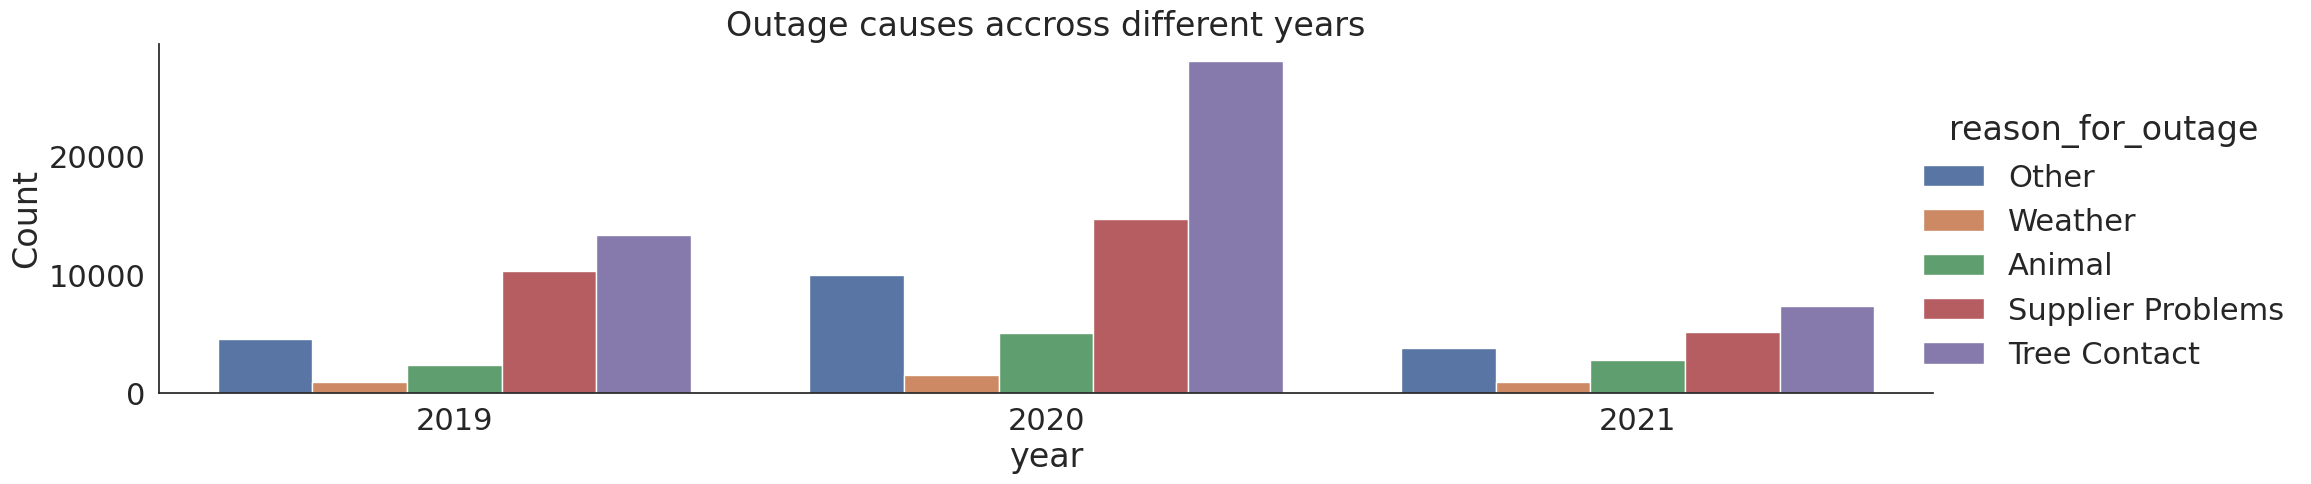

In [26]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=df_clean_final, aspect=4, kind='count',
                       hue='reason_for_outage', order=range(2019, 2022))
    g.set_ylabels('Count')
    g.set(title = "Outage causes accross different years")
    sns.set(font_scale=2)

plt.savefig('../Fig/outage_reasons.png', bbox_inches='tight')

# Normality check 

/Users/uma/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


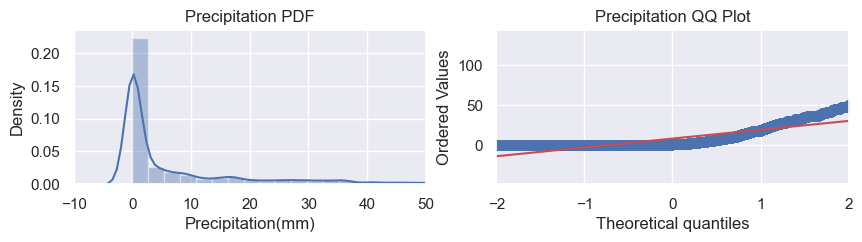

In [33]:
plt.figure(figsize=(10,2))
plt.subplot(121)
sns.distplot(df_clean_final['precipitation'])
sns.set(font_scale=1)
plt.title('Precipitation PDF') 
plt.xlim(-10,50)
plt.xlabel('Precipitation(mm)')
plt.subplot(122)
stats.probplot(df_clean_final['precipitation'], dist="norm", plot=plt)
plt.title('Precipitation QQ Plot')
plt.xlim(-2,2)
plt.savefig('../Fig/prec_normality.png', bbox_inches='tight', pad_inches=0.0)
plt.show();



/Users/uma/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


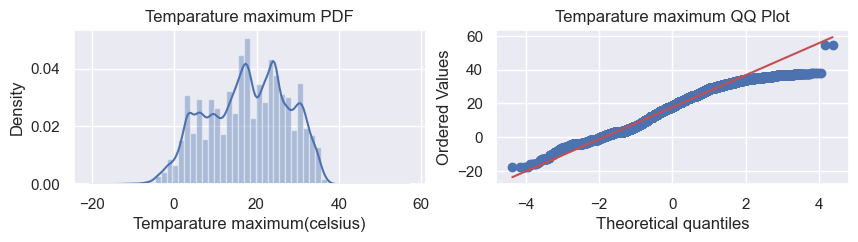

In [34]:
plt.figure(figsize=(10,2))
plt.subplot(121)
sns.distplot(df_clean_final['temp_max'])
plt.title('Temparature maximum PDF')
plt.xlabel('Temparature maximum(celsius)')
plt.subplot(122)
stats.probplot(df_clean_final['temp_max'], dist="norm", plot=plt)
plt.title('Temparature maximum QQ Plot')
plt.savefig('../Fig/Tmax_normality.png', bbox_inches='tight', pad_inches=0.0)
plt.show()


/Users/uma/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


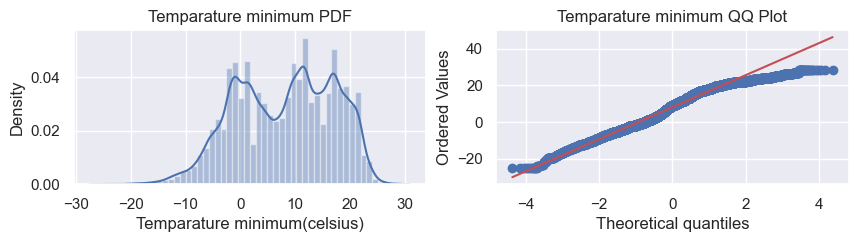

In [35]:
plt.figure(figsize=(10,2))
plt.subplot(121)
sns.distplot(df_clean_final['temp_min'])
plt.title('Temparature minimum PDF')
plt.xlabel('Temparature minimum(celsius)')
plt.subplot(122)
stats.probplot(df_clean_final['temp_min'], dist="norm", plot=plt)
plt.title('Temparature minimum QQ Plot')
plt.savefig('../Fig/Tmin_normality.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

/Users/uma/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


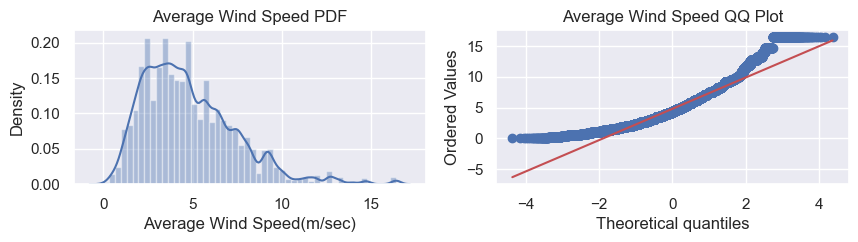

In [36]:
plt.figure(figsize=(10,2))
plt.subplot(121)
sns.distplot(df_clean_final['Avg_daily_wind'])
plt.title('Average Wind Speed PDF')
plt.xlabel('Average Wind Speed(m/sec)')
plt.subplot(122)
stats.probplot(df_clean_final['Avg_daily_wind'], dist="norm", plot=plt)
plt.title('Average Wind Speed QQ Plot')
plt.savefig('../Fig/awnd_normality.png', bbox_inches='tight', pad_inches=0.0)
plt.show()


/Users/uma/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


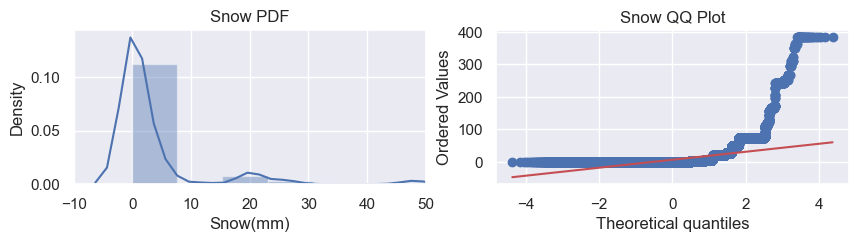

In [37]:
plt.figure(figsize=(10,2))
plt.subplot(121)
sns.distplot(df_clean_final['snow'])
plt.title('Snow PDF')
plt.xlim(-10,50)
plt.xlabel('Snow(mm)')
plt.subplot(122)
stats.probplot(df_clean_final['snow'], dist="norm", plot=plt)
plt.title('Snow QQ Plot')

plt.savefig('../Fig/snow_normality.png', bbox_inches='tight', pad_inches=0.0)

plt.show()


/Users/uma/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


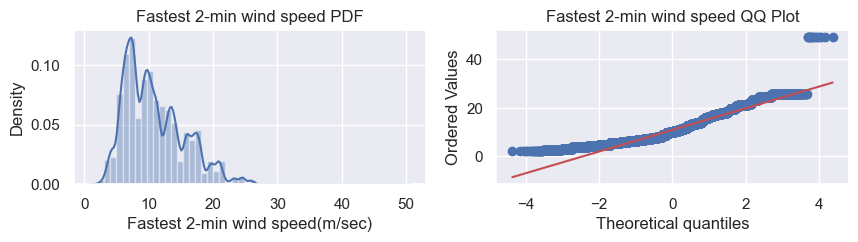

In [38]:

plt.figure(figsize=(10,2))
plt.subplot(121)
sns.distplot(df_clean_final['fastest_2_min_wind_speed'])
plt.title('Fastest 2-min wind speed PDF')
plt.xlabel('Fastest 2-min wind speed(m/sec)')
plt.subplot(122)
stats.probplot(df_clean_final['fastest_2_min_wind_speed'], dist="norm", plot=plt)
plt.title('Fastest 2-min wind speed QQ Plot')
plt.savefig('../Fig/f2ws_normality.png', bbox_inches='tight', pad_inches=0.0)
plt.show()


In [39]:
df_clean_final.columns

Index(['DATE', 'time_out', 'day', 'month', 'year', 'date_in', 'time_in',
       'outage_duration', 'number_of_customers_affected', 'city_town',
       'reason_for_outage', 'Latitude', 'Longitude', 'STATION', 'NAME_x',
       'POPULATION', 'NAME_y', 'LATITUDE', 'LONGITUDE', 'Avg_daily_wind',
       'precipitation', 'snow', 'temp_max', 'temp_min',
       'fastest_2_min_wind_speed', 'YEAR', 'MONTH', 'DAY', 'SAIDI'],
      dtype='object')

In [40]:
#saving the data
df_clean_final.to_csv('../output/weather_outage_merged.csv', index=False)

# Statistical Analysis

In [41]:
df_model = df_clean_final[['Avg_daily_wind',
       'precipitation',  'temp_max','temp_min','snow',
       'fastest_2_min_wind_speed','SAIDI']].copy()

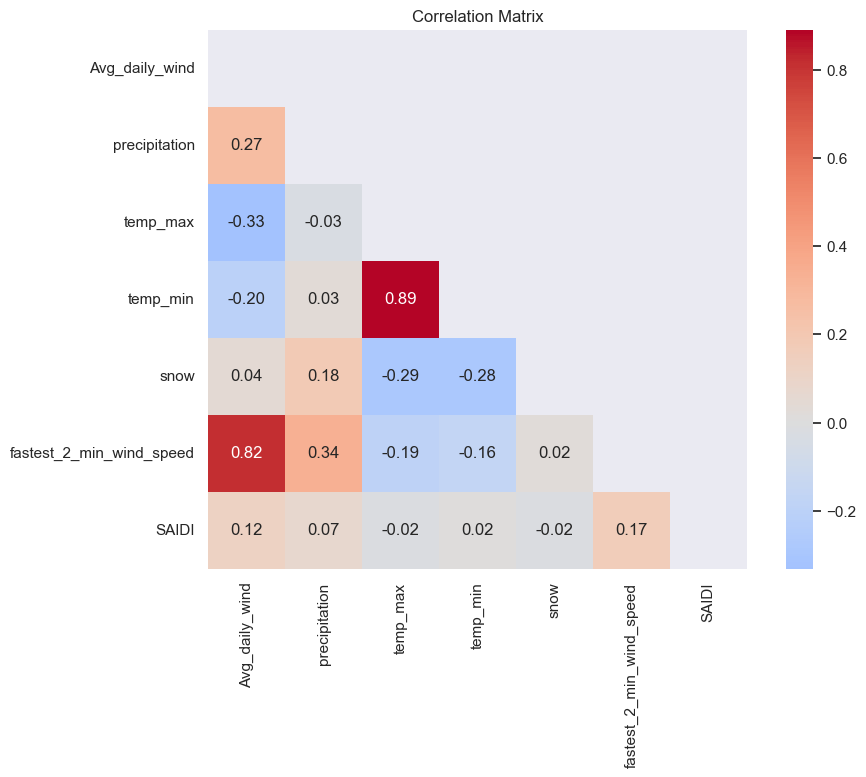

In [42]:
#Calculate pairwise-correlation
matrix = df_model.corr()
#Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))
#Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
plt.figure(figsize=(10, 7)) 
sns.heatmap(matrix, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('../Fig/correlation.png', bbox_inches='tight', pad_inches=0.0)
plt.show();


In [43]:
df_model.head(5)

,Avg_daily_wind,precipitation,temp_max,temp_min,snow,fastest_2_min_wind_speed,SAIDI
0,9.2,0.0,2.8,-4.3,4.196881,19.7,0.022069
1,1.1,7.4,12.8,5.6,0.000000,5.4,0.000184
2,2.6,0.0,18.9,6.1,0.000000,5.8,0.000192
3,2.0,0.0,25.0,12.8,0.000000,6.3,0.028930
4,2.5,0.0,30.0,16.1,0.000000,7.2,0.023663


In [44]:
# Remove the response variable from X
X = df_model.drop(["SAIDI",'temp_max','Avg_daily_wind'],axis = 1)

y = df_model[['SAIDI']]
X2 = X.assign(Intercept=1)

sm_model = sm.OLS(y, X2)
results = sm_model.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  SAIDI   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     862.8
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:36:12   Log-Likelihood:                -66735.
No. Observations:              111212   AIC:                         1.335e+05
Df Residuals:                  111207   BIC:                         1.335e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
precipitation           